In [3]:
import sys
import pandas
import numpy
import matplotlib
import seaborn
import scipy
import sklearn

In [4]:
#import the specific packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('creditcard.csv')

In [6]:
#explore dataset
print(data.head)

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [7]:
print(data.shape)

(284807, 31)


In [8]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [9]:
data=data.sample(frac=0.2,random_state=1)
print(data.shape)

(56961, 31)


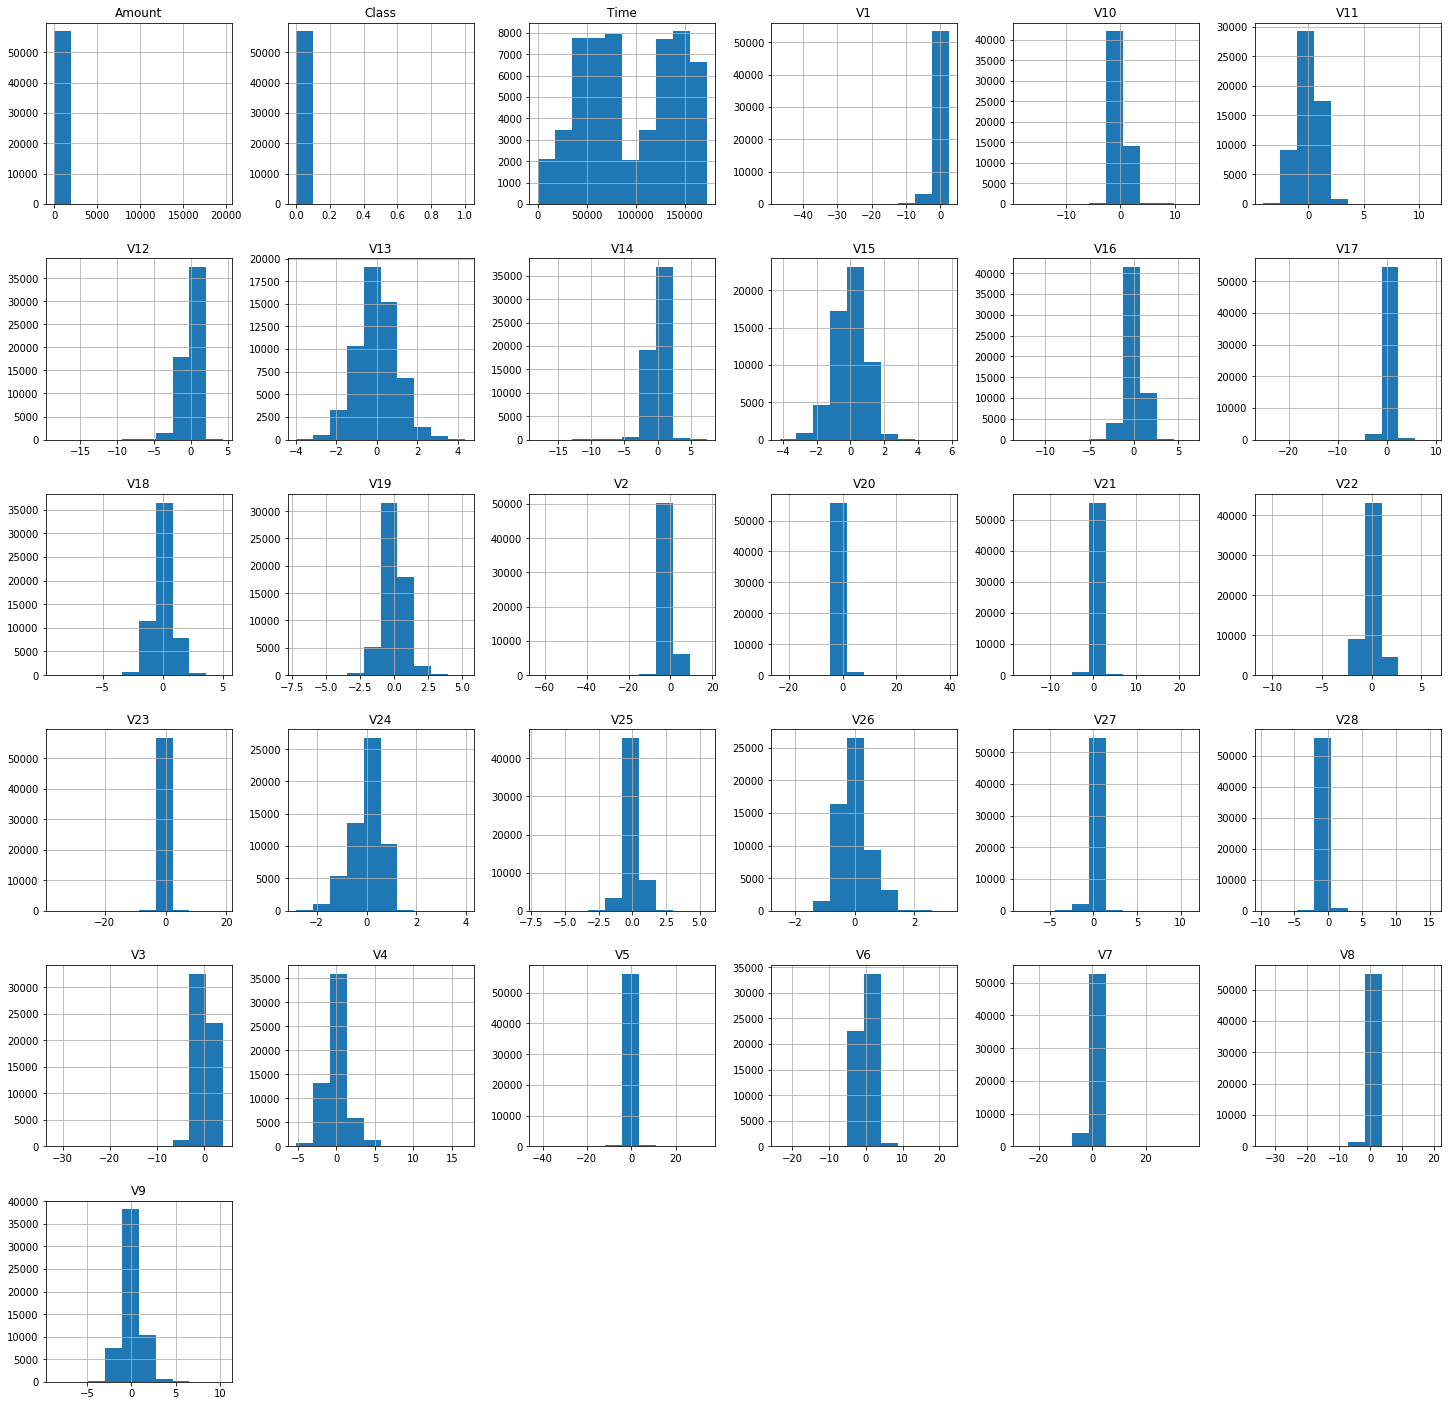

In [10]:
data.hist(figsize=(25,25))
plt.show()

In [11]:
#Very Few Fraudulent transactions according to class plot.

In [12]:
#Determining the number of Fraud cases in dataset
Fraud=data[data['Class']==1]
Valid=data[data['Class']==0]

outlier_fraction=len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases:',len(Fraud))
print('Valid Cases:',len(Valid))


0.0015296972254457222
Fraud Cases: 87
Valid Cases: 56874


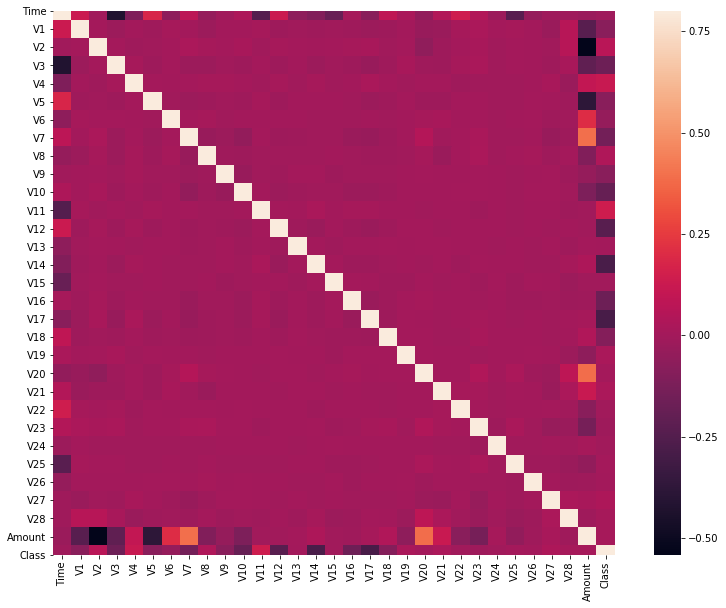

In [13]:
#Plot a Corelation Matrix
corrmat=data.corr()
fig=plt.figure(figsize=(14,10))

sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [14]:
#
#No strong relationships between different parameters.Light colors show a strong positive correlation whereas deep ones show a 
#strong negative correlation.
#


In [15]:
#Get all data from columns
columns=data.columns.tolist()

#Filter columns we donot need
columns=[c for c in columns if c not in ["Class"]]

#Store variables we will be predicting on
target='Class'

X=data[columns]
Y=data['Class']

#print shape of X and Y
print(X.shape)
print(Y.shape)

(56961, 30)
(56961,)


In [17]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state
state=1

#define outlier detection methods
classifiers={
    "Isolation Forest":IsolationForest(max_samples=len(X),contamination=outlier_fraction,random_state=state),
    
    "Local Outlier Fraction":LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
}

In [21]:
#Fit the model
n_outliers=len(Fraud)
for i,(cla_name,cla) in enumerate(classifiers.items()):
    #Fit data and tag outliers:
    if cla_name=="Local Outlier Fraction":
        y_predict=cla.fit_predict(X)
        scores_predict=cla.negative_outlier_factor_
    else:
        cla.fit(X)
        scores_predict=cla.decision_function(X)
        y_predict=cla.predict(X)
    #Reshaping the prediction values to 0 for valid and 1 for fraud
    y_predict[y_predict==1]=0
    y_predict[y_predict==-1]=1
    errors=(y_predict!=Y).sum()
    
    #Classification Metrics
    print(cla_name,':',errors)
    print(accuracy_score(Y,y_predict))
    print(classification_report(Y,y_predict))

C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest : 129
0.9977352925685996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.26      0.26      0.26        87

    accuracy                           1.00     56961
   macro avg       0.63      0.63      0.63     56961
weighted avg       1.00      1.00      1.00     56961

Local Outlier Fraction : 173
0.9969628342199048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.01      0.01      0.01        87

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961



In [22]:
"""
By using Local Outlier Factor we have an overall accuracy of 99.69 percentage.However the accuracy of False Positives and False 
Negatives using Local Outlier Fraction is around 1% which is very low.
By using Isolation Forest we have an overall accuracy of 99.77%. However the accuracy of False Positives and Negatives is 
around 26% which is better than Outlier Fraction Method.
The accuracy percentage can be improved by using a larger fraction of dataset or the whole dataset however due to computational
requirements the dataframe has been scaled down.
"""

'\nBy using Local Outlier Factor we have an overall accuracy of 99.69 percentage.However the accuracy of False Positives and False \nNegatives using Local Outlier Fraction is around 1% which is very low.\nBy using Isolation Forest we have an overall accuracy of 99.77%. However the accuracy of False Positives and Negatives is \naround 26% which is better than Outlier Fraction Method.\nThe accuracy percentage can be improved by using a larger fraction of dataset or the whole dataset however due to computational\nrequirements the dataframe has been scaled down.\n'